# Projeto 2 - Ciência dos Dados

______________________________________________________

## Participantes:


Henrique Andrade Albuqurque 


Mateus Marinheiro 


Matheus Constante

________________________________________

## Introdução

### Tema:

   Previsão da nota média do Enem de um aluno baseado nos seguintes features:

   

### Target:
 
 - NU_NOTA_MT:
   - Nota final na área de Matemática e Tecnologias no ENEM de 2022 por participante
   


### Features: 

 - TP_FAIXA_ETARIA:
   - Faixa Etária dos participantes
      - 1- Menor de 17 anos
      - 2- 17 anos
      - 3- 18 anos
      - 4- 19 anos
      - 5- 20 anos
      - 6- 21 anos
      - 7- 22 anos
      - 8- 23 anos
      - 9- 24 anos
      - 10- 25 anos
      - 11- Entre 26 e 30 anos
      - 12- Entre 31 e 35 anos
      - 13- Entre 36 e 40 anos
      - 14- Entre 41 e 45 anos
      - 15- Entre 46 e 50 anos
      - 16- Entre 51 e 55 anos
      - 17- Entre 56 e 60 anos
      - 18- Entre 61 e 65 anos
      - 19- Entre 66 e 70 anos
      - 20- Maior de 70 anos

 - TP_SEXO: 
    - Sexo do Participante
      - M - Masculino
      - F - Feminino
 - TP_COR_RAÇA:
    - Cor/Raça do participante
      - 0- Não declarado
      - 1- Branca
      - 2- Preta
      - 3- Parda
      - 4- Amarela
      - 5- Indígina
      - 6- Não dispõe da informação
 - IN_TREINEIRO:
    - Indica se o inscrito fez a prova com intuito de apenas treinar seus conhecimentos
      - 0 - Sim
      - 1 - Não
 - TP_ESCOLA:
    - Tipo de escola do Ensino Médio:
       - 1- Não respondeu
       - 2- Pública
       - 3- Privada

________

Carregando algumas bibliotecas:

In [18]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [19]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
c:\Users\mathe\Projeto-2-Ciencia-dos-Dados-2


Carregando a base de dados:

In [20]:
dados = pd.read_excel('DADOS\MICRODADOS_ENEM_2022.xlsx') # Lê o arquivo excel
dados.head()

KeyboardInterrupt: 

Separando colunas de Target e Features:

In [ ]:
dados = dados.loc[:, ["TP_FAIXA_ETARIA", "TP_SEXO", "TP_COR_RACA", "TP_ESCOLA", "IN_TREINEIRO", "NU_NOTA_MT"]] # Seleciona as colunas que serão utilizadas como features
dados.head()

,TP_FAIXA_ETARIA,TP_SEXO,TP_COR_RACA,TP_ESCOLA,IN_TREINEIRO,NU_NOTA_MT
0,14,M,2,1,0,NaN
1,14,M,1,1,0,NaN
2,5,F,2,1,0,565.3
3,6,M,3,1,0,416.0
4,4,M,3,1,0,NaN


#### Retirando Linhas vazias da coluna Target

In [ ]:
# Remover as linhas com NaN apenas na coluna 'NU_NOTA_MT'
dados = dados.dropna(subset=['NU_NOTA_MT'])
dados.head(5)


,TP_FAIXA_ETARIA,TP_SEXO,TP_COR_RACA,TP_ESCOLA,IN_TREINEIRO,NU_NOTA_MT
2,5,F,2,1,0,565.3
3,6,M,3,1,0,416.0
7,6,F,2,1,0,404.9
9,4,F,3,1,0,435.3
11,2,F,1,3,0,456.8


### Classificando Variáveis genéricas

In [ ]:
# Mudando o nome das variáveis da coluna TP_FAIXA_ETARIA

novas_categorias = {1 : '< 17', 2 : '17', 2 : '18', 3 : '19', 4 : '20', 5 : '21', 6 : '22', 7 : '23', 8 : '24', 9 : '25', 10 : '26-30', 11 : '31-35', 12 : '36-40', 13 : '41-45', 14 : '46-50', 15 : '51-55', 16 : '56-60', 17 : '61-65', 18 : '66-70', 19 : '71-75', 20 : '70 >'}
dados['TP_FAIXA_ETARIA'] = dados['TP_FAIXA_ETARIA'].astype('category').cat.rename_categories(novas_categorias)

# Muda o nome das variáveis da coluna TP_COR_RACA]

novas_categorias = {0 : 'Não declarado', 1 : 'Branca', 2 : 'Preta', 3 : 'Parda', 4 : 'Amarela', 5 : 'Indígena', 6 : 'Não dispõe da informação'}
dados['TP_COR_RACA'] = dados['TP_COR_RACA'].astype('category').cat.rename_categories(novas_categorias)

# Muda o nome das variáveis da coluna TP_ESCOLA

novas_categorias = {1 : 'Não respondeu', 2 : 'Pública', 3 : 'Privada'}
dados['TP_ESCOLA'] = dados['TP_ESCOLA'].astype('category').cat.rename_categories(novas_categorias)

# Muda o nome das variáveis da coluna IN_TREINEIRO

novas_categorias = {0 : 'Sim', 1 : 'Não'}
dados['IN_TREINEIRO'] = dados['IN_TREINEIRO'].astype('category').cat.rename_categories(novas_categorias)

# Muda o nome das variáveis da coluna TP_SEXO

novas_categorias = {'M' : 'Masculino', 'F' : 'Feminino'}
dados['TP_SEXO'] = dados['TP_SEXO'].astype('category').cat.rename_categories(novas_categorias)



#### Análise descritiva detalhada das variáveis


- Faixa Etária x Notas de Matemática

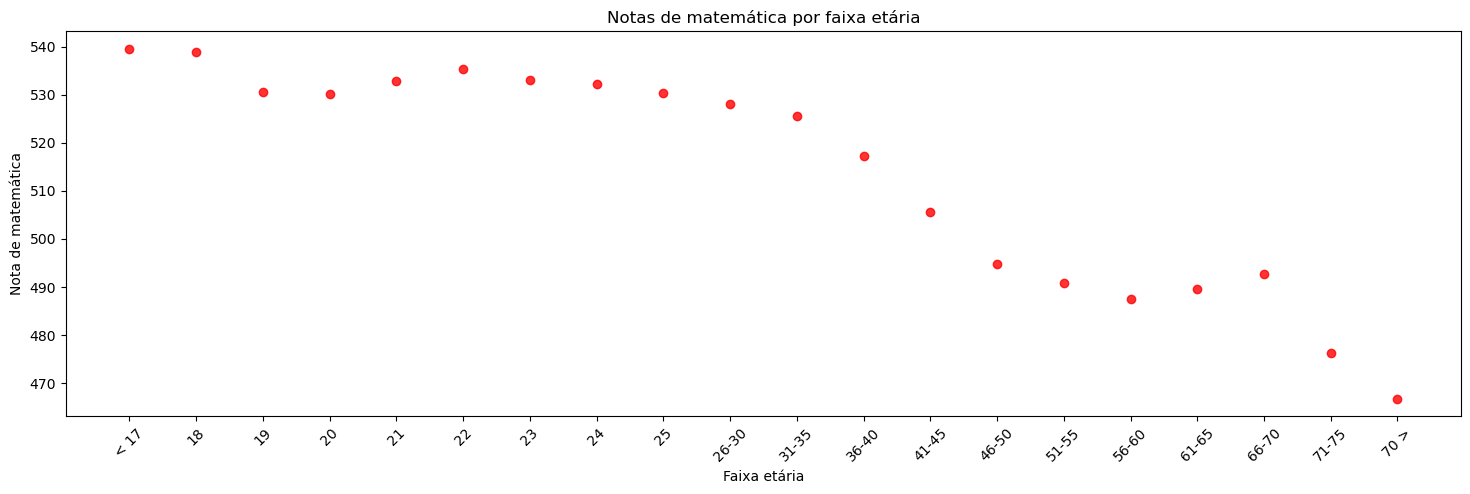

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Supondo que 'dados' seja o DataFrame que contém suas notas e faixas etárias

# Médias das notas de matemática por faixa etária
y = dados.groupby(['TP_FAIXA_ETARIA']).NU_NOTA_MT.mean()

# Criando um array com os índices para o eixo x
x = np.arange(len(y))

# Gráfico de dispersão das notas de matemática por faixa etária
fig = plt.figure(figsize=(18, 5))
plt.scatter(x, y, c='red', alpha=0.8)

# Configurando os ticks do eixo x
plt.xticks(x, labels=y.index, rotation=45)

plt.title('Notas de matemática por faixa etária')
plt.xlabel('Faixa etária')
plt.ylabel('Nota de matemática')
plt.show()


- Gráfico da média de notas por faixa etária

O gráfico acima ilustra a média das notas em relação às diferentes faixas etárias. Optamos por esse formato de gráfico com médias, uma vez que a inclusão de todas as notas tornaria a representação demasiadamente poluída. Quanto ao uso de um histograma, devido à quantidade significativa de dados (20 conjuntos), poderia gerar certa confusão na interpretação.

É possível observar uma influência da faixa etária nas notas de Matemática. Essa influência não é integral, porém evidencia-se que, em média, as notas tendem a diminuir conforme a faixa etária aumenta.

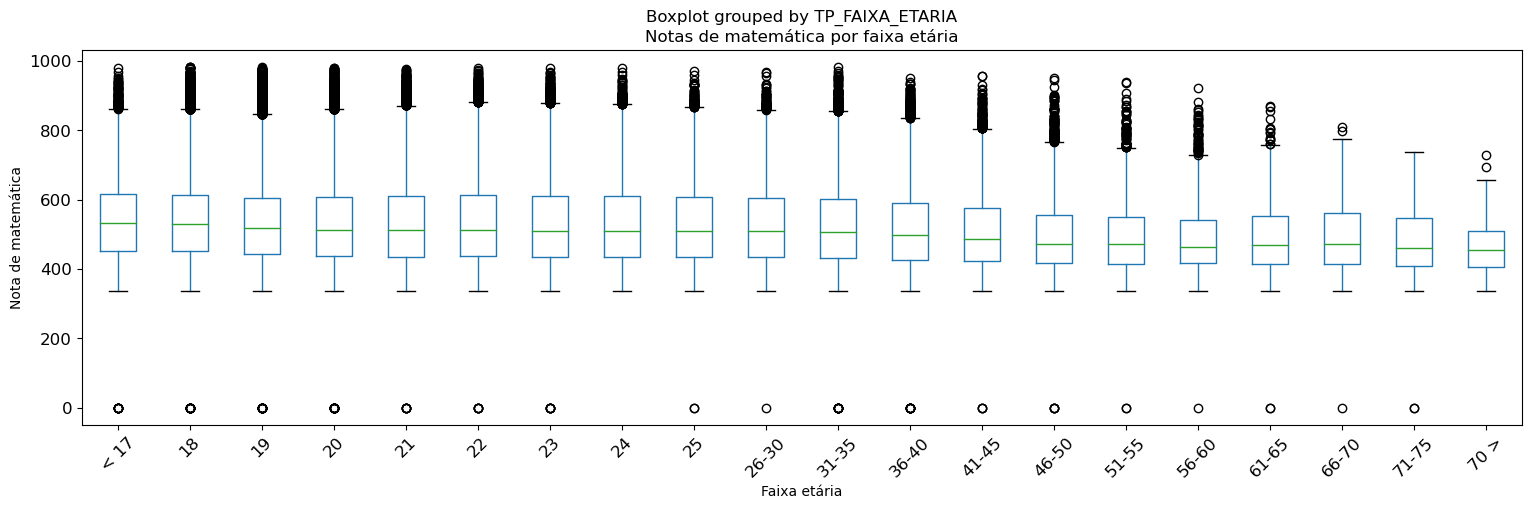

In [ ]:
dados.boxplot(column='NU_NOTA_MT', by='TP_FAIXA_ETARIA', figsize=(18, 5), grid=False, fontsize=12, rot=45)
plt.title('Notas de matemática por faixa etária')
plt.xlabel('Faixa etária')
plt.ylabel('Nota de matemática')
plt.show()



- Gráfico boxplot notas de matemática por faixa etária

O gráfico acima, utilizando o boxplot, ilustra alguns dados das notas dos alunos conforme a faixa etária. Da mesma forma que no gráfico acima, é possível observar que, de maneira geral, o desempenho médio dos alunos vai decaindo à medida que a idade aumenta. Além disso, é possível observar que os quartis do boxplot diminuem de tamanho à medida que a idade aumenta, mostrando que as notas têm menos variação em idades mais altas."

- Sexo x Nota de Matemática

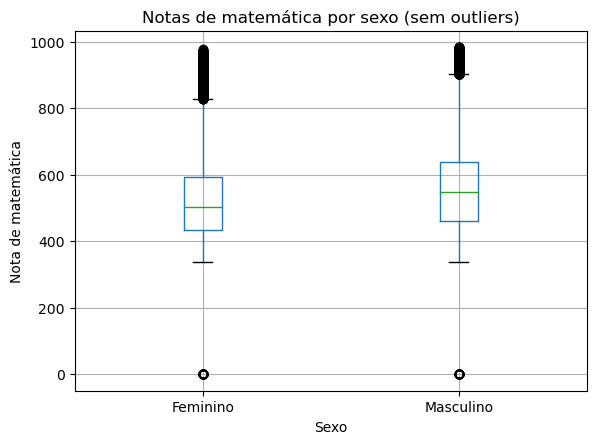

In [ ]:
# Boxplot das notas de matemática por sexo sem outliers
dados.boxplot(column='NU_NOTA_MT', by='TP_SEXO')
plt.title('Notas de matemática por sexo (sem outliers)')
plt.suptitle('')
plt.xlabel('Sexo')
plt.ylabel('Nota de matemática')
plt.show()



- Gráfico notas de matemática por sexo

Ao analisar esse gráfico boxplot, podemos observar que, no contexto das notas de Matemática, o grupo dos homens por ter a caixa mais alta e a mediana mais elevada, tende a ter um desempenho médio superior nessa disciplina em comparação com as mulheres.

- Cor/Raça x Notas de Matemática

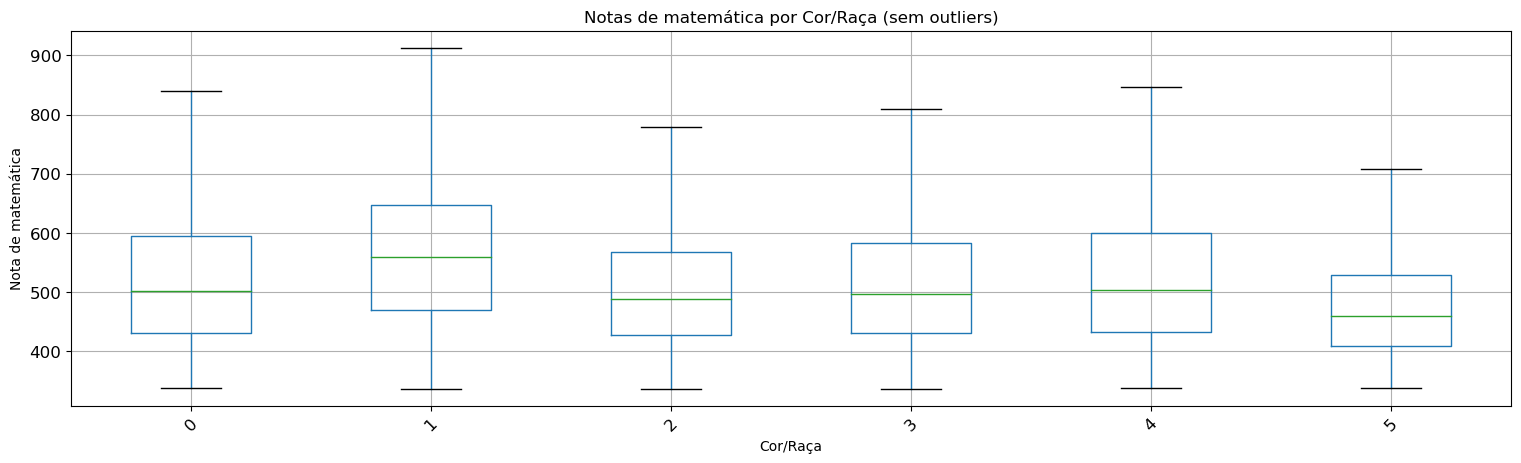

In [ ]:
# Boxplot das notas de matemática por sexo sem outliers
dados.boxplot(column='NU_NOTA_MT', by='TP_COR_RACA', sym='', figsize=(18, 5), grid=False, fontsize=12, rot=45)
plt.title('Notas de matemática por Cor/Raça (sem outliers)')
plt.suptitle('')
plt.xlabel('Cor/Raça')
plt.ylabel('Nota de matemática')
plt.grid()
plt.show()



- Gráfico notas de matemática por cor/raça 

Branca: Esta raça/cor possui a maior média, evidenciada pelo quadrado mais alto no gráfico, indicando um desempenho superior em relação às outras categorias.

Amarelos e Não Declarados: Apresentam uma média intermediária, ficando em segundo lugar no desempenho acadêmico em comparação com os brancos. Embora não alcancem a média mais alta, estão acima das outras categorias.

Pretos e Pardos: Essas raças/cores ficam em terceiro lugar em termos de média, indicando um desempenho menor em comparação com brancos, amarelos e não declarados.

Indígenas: Apresentam a menor média dentre todas as raças/cores analisadas, sugerindo um desempenho acadêmico mais baixo em relação às outras categorias mencionadas no gráfico Box Plot.

Essa análise das médias das raças/cores evidencia uma disparidade nos resultados acadêmicos, sugerindo diferenças de desempenho entre os grupos. É importante notar que a interpretação desses dados deve ser feita com cautela, considerando fatores sociais, econômicos e estruturais que podem influenciar esses resultados.

 - Tipo de Escola x Nota de Matemática

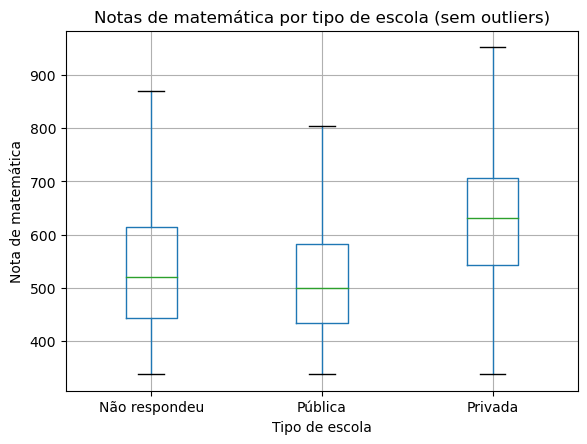

In [ ]:
# box plot das notas de matemática por tipo de escola
dados.boxplot(column='NU_NOTA_MT', by='TP_ESCOLA', sym='')
plt.title('Notas de matemática por tipo de escola (sem outliers)')
plt.suptitle('')
plt.xlabel('Tipo de escola')
plt.ylabel('Nota de matemática')
plt.show()


- Gráfico boxplot notas de matemática por tipo de escola

Escola Privada: Apresenta um desempenho muito superior em relação às outras categorias. Possui uma média significativamente mais alta em comparação com as demais escolas, representadas pelas pessoas que não responderam e, em especial, em relação às escolas públicas.

Pessoas que não Responderam: Possuem um desempenho intermediário em relação às diferentes categorias de escolas. No entanto, quando comparadas especificamente com o desempenho das escolas particulares, possuem um desempenho inferior e um desempenho superior as escolas publicas.

Escola Pública: Apresenta um desempenho significativamente inferior em relação às escolas privadas e em relação às pessoas que não responderam. Isso sugere que, em média, as escolas públicas têm um desempenho menor comparado as demais.

Essa análise ressalta uma disparidade no desempenho entre os tipos de escolas. É importante considerar diversos fatores, como investimento, estrutura educacional, qualidade de ensino e recursos disponíveis em cada tipo de instituição, ao interpretar esses dados.

 - Treineiro/Não treineiro x Nota de Matemática

In [ ]:
# box plot das notas de matemática por treineiro/nao treineiro

dados.boxplot(column='NU_NOTA_MT', by='IN_TREINEIRO', sym='', figsize=(18, 5), grid=False, fontsize=12, rot=45)
plt.title('Notas de matemática por treineiro/não treineiro (sem outliers)')
plt.suptitle('')
plt.xlabel('Treineiro/Não treineiro')
plt.ylabel('Nota de matemática')
plt.grid()
plt.show()


KeyError: 'IN_TREINEIRO'

## Referências:

 - https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados